<img src="http://cliparts.co/cliparts/6iy/oBb/6iyoBbdpT.gif"/>

# Human Resource Analytics - Milestone Report

**"Yeah, they all said that me..."**, *Bob replied as we were at Starbucks sipping on our dark roast coffee. Bob is a friend of mine and was an owner of a multi-million dollar company, that's right, "m-i-l-l-i-o-n". He used to tell me stories about how his company's productivity and growth has sky rocketed from the previous years and everything has been going great. But recently, he's been noticing some decline within his company. In a five month period, he lost one-fifth of his employees. At least a dozen of them throughout each department made phone calls and even left sticky notes on their tables informing him about their leave. Nobody knew what was happening. In that year, he was contemplating about filing for bankruptcy. And now fast-forward seven months later, he's having a conversation with his co-founder of the company. The conversation ends with, **"I quit..."***

That is the last thing anybody wants to hear from their employees. In a sense, it’s the employees who make the company. It’s the employees who do the work. It’s the employees who shape the company’s culture. Long-term success, a healthy work environment, and high employee retention are all signs of a successful company. But when a company experiences a high rate of employee turnover, then something is going wrong. This can lead the company to huge monetary losses by these innovative and valuable employees.

Companies that maintain a healthy organization and culture are always a good sign of future prosperity. Recognizing and understanding what factors that were associated with employee turnover will allow companies and individuals to limit this from happening and may even increase employee productivity and growth. These predictive insights give managers the opportunity to take corrective steps to build and preserve their successful business.

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**

<img src="http://www.gifmania.us/Animated-Gifs-Manga-Anime/Free-Animations-Police-Anime-Series/Images-Detective-Conan/Detective-Conan-76540.gif"/>

### Business Problem:
*Bob's multi-million dollar company is about to go bankrupt and he wants to know why his employees are leaving.*

### Client:
*Bob (The CEO of Company X)*

**My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.**

*I’ll be following a typical data science pipeline, which is I call “OSEMN” (pronounced awesome).*

1. **O**btaining the data is the first approach in solving the problem.

2. **S**crubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3. **E**xploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix. 

4. **M**odeling the data will give us our predictive power on whether an employee will leave. 

5. I**N**terpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found? 

**Note:** *The data was found from the “Human Resources Analytics” dataset provided by Kaggle’s website. https://www.kaggle.com/ludobenistant/hr-analytics*

**Note:** THIS DATASET IS SIMULATED

# Part 1: Obtaining the Data 
***

In [6]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [7]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.DataFrame.from_csv('C:/Users/Randy/Documents/SpringBoard Capstone Project 1/HR Analytics/HR_comma_sep.csv', index_col=None)

# Part 2: Scrubbing the Data 
***

*Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.*

In [8]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [9]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [12]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3: Exploring the Data
*** 

##  3a. Statistical Overview 
The dataset has:
 - About 15,000 employee observations and 10 features  <img style="float: right; width: 200px; height: 125px;", src="https://s-media-cache-ak0.pinimg.com/originals/32/ef/23/32ef2383a36df04a065b909ee0ac8688.gif"/>
 - The company had a turnover rate of about 24%
 - Mean satisfaction of employees is 0.61

In [13]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [14]:
# Check the type of our features. 
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [15]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [17]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [19]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##  3b. Correlation Matrix & Heatmap
***
**Highly correlated features:**
- (+) projectCount & averageMonthlyHours & evaluation
- (-) turnover & satisfaction

**Stop and Think:**
- What features affect our target variable the most (turnover)?
- What features have strong correlations with each other?
- Can we do a more in depth examination of these features?

**Summary:**

From the heatmap, there seems to be heavy **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. 

For the **negative(-)** relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied. 

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


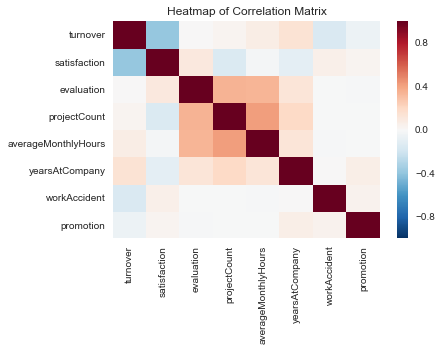

In [20]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

##  3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)
***
**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:
 - **Satisfaction** - There seems to be a huge spike for employees with low satisfaction and high satisfaction.
 - **Evaluation** - There seems to be a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
 - **AverageMonthlyHours** - There seems to be another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
 - The evaluation and average monthly hour graphs both seem to share a similar distribution. 
 - Maybe employees with lower average monthly hours were evaluated less and vice versa.
 - If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.
 
**Stop and Think:** 
 - Is there a reason for the high spike in low satisfaction of employees?
 - Could employees be grouped in a way with these features?
 - Is there a correlation between evaluation and averageMonthlyHours?

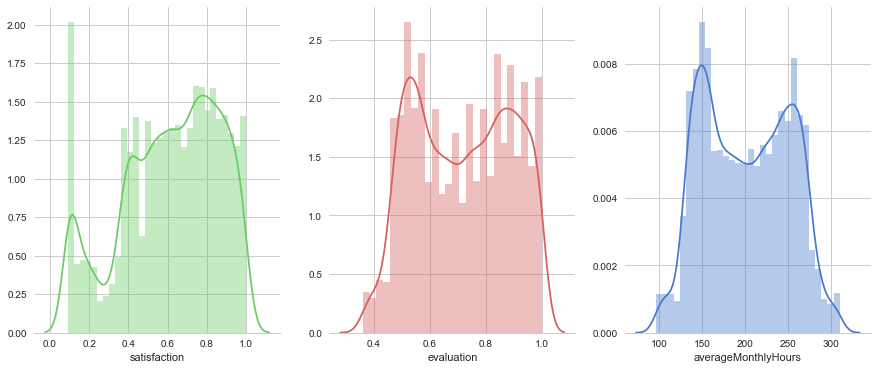

In [146]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.despine(left=True)

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=True, color="g", ax=axes[0])

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=True, color="r", ax=axes[1])

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=True, color="b", ax=axes[2])

##  3d. Salary V.S. Turnover
***
**Summary:** This is not unusual. Here's what I found:
 - Majority of employees who left either had **low** or **medium** salary.
 - Barely any employees left with **high** salary
 - Employees with low to average salaries tend to leave the company.
 
**Stop and Think:** 
 - What is the work environment like for low, medium, and high salaries?
 - What made employees with high salaries to leave?

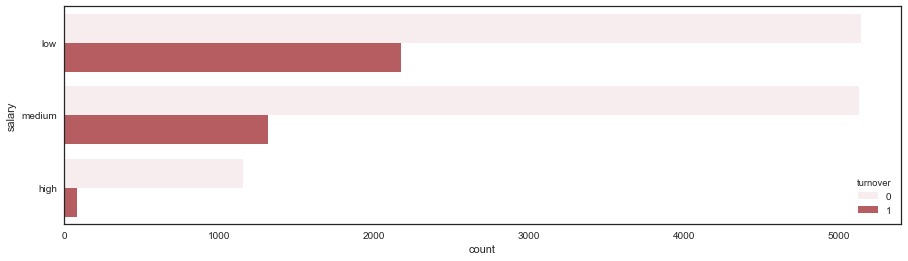

In [125]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df, color="r");

##  3e. Department V.S. Turnover 
***
**Summary:** Let's see which department . Here's what I found:
 - The sales, technical, and support department were the top 3 departments to have employee turnover
 - The management department had the smallest amount of turnover
 
**Stop and Think:** 
 - If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

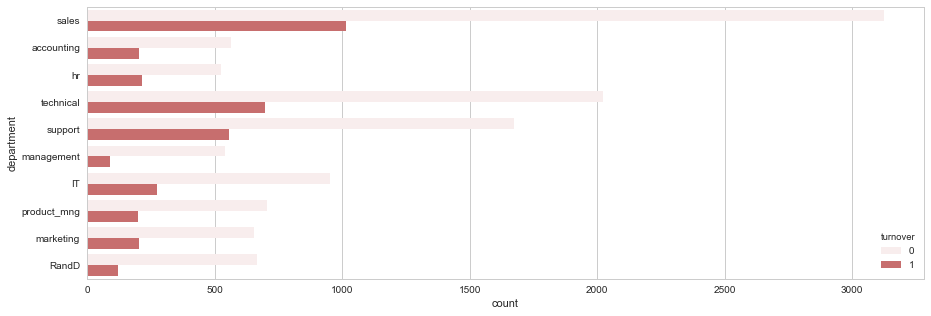

In [143]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df, color="r");

##  3f. Turnover V.S. ProjectCount 
***
**Summary:** This graph is quite interesting as well. Here's what I found:
 - More than half of the employees with **2,6, and 7** projects left the company
 - Majority of the employees who did not leave the company had **3,4, and 5** projects
 - All of the employees with **7** projects left the company
 - There is an increase in employee turnover rate as project count increases
 
**Stop and Think:** 
 - Why are employees leaving at the lower/higher spectrum of project counts?
 - Maybe this means that employees with project counts 2 or less are not worked hard enough or are not highly valued, thus leaving the company?
 - Maybe employees with 6+ projects are getting overworked, thus leaving the company?



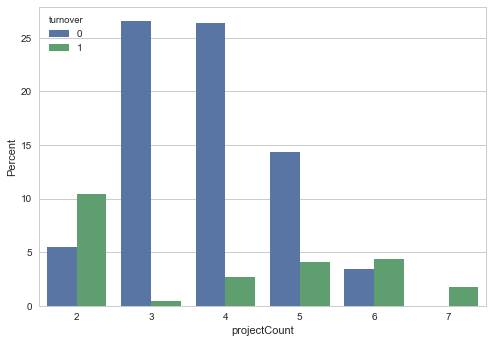

In [142]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

##  3g. Turnover V.S. Evaluation 
***
**Summary:** 
 - There seems to be a biomodal distrubtion for those that had a turnover. 
 - Employees with **low** performance tend to leave the company more
 - Employees with **high** performance tend to leave the company more
 - The **sweet spot** seems for those that stayed seems to be within **0.6-0.8**

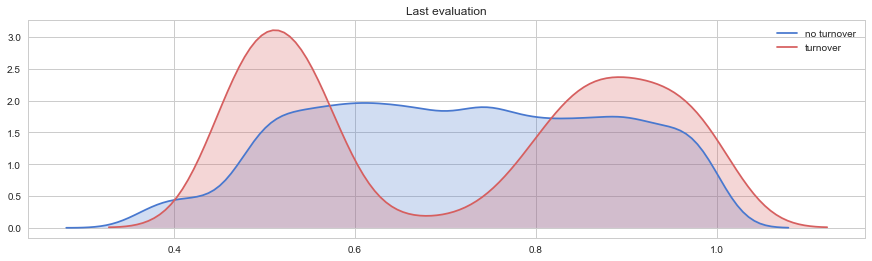

In [172]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

##  3h. Turnover V.S. AverageMonthlyHours 
***
**Summary:** 
 - Another bi-modal distrubtion for employees that turnovered 
 - Employees who had less hours of work **(~150hours or less)** left the company more
 - Employees who had too many hours of work **(~250 or more)** left the company 
 - Employees who left generally were **underworked** or **overworked**.

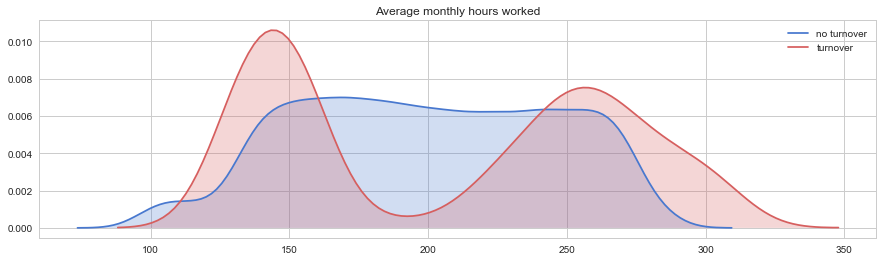

In [173]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

##  3i. ProjectCount VS AverageMonthlyHours 
***

**Summary:**
 - As project count increased, so did average monthly hours
 - Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. 
 - Looks like employees who **did not** have a turnover had **consistent** averageMonthlyHours, despite the increase in projects
 - In contrast, employees who **did** have a turnover had an increase in averageMonthlyHours with the increase in projects

**Stop and Think:** 
 - What could be the meaning for this? 
 - Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

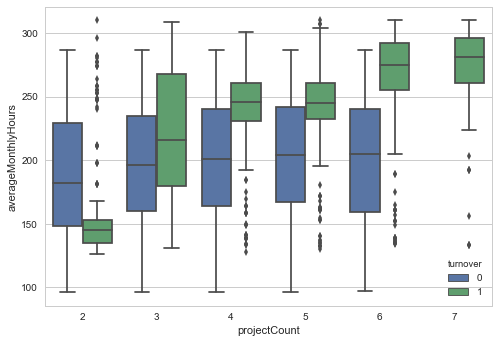

In [153]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

##  3j. ProjectCount VS Evaluation
***
**Summary:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There seems to be an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 

**Questions to think about:**
 - Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? 
 - Shouldn't employees with lower evaluations tend to leave the company more? 

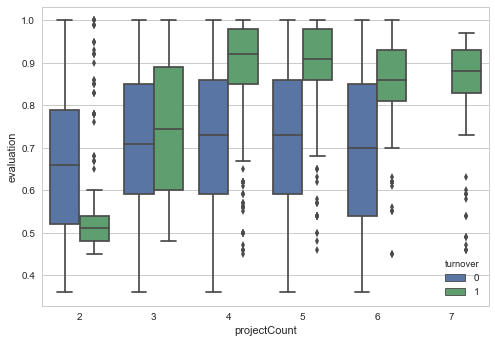

In [154]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

##  3k. Satisfaction VS Evaluation
***
**Summary:** This is by far the most compelling graph. This is what I found:
 - There is **3** distinct clusters for employees who left the company
 
**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. 
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. 
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

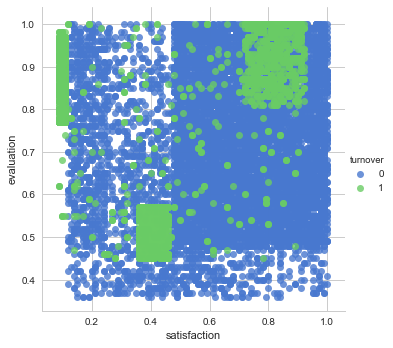

In [182]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

## 3l. K-Means Clustering of Employee Turnover
***
**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee 

**Cluster 3 (Green):** Hard-working and Happy Employee 

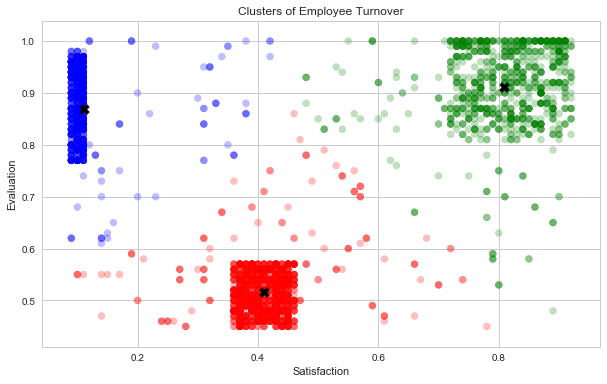

In [190]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# 4. Modeling the Data
***

# 5. Interpreting the Data
***

<img style=" width: 1100px; height: 300px;", src="https://s-media-cache-ak0.pinimg.com/originals/3f/48/3e/3f483e247e063039ea4997faee298c04.gif"/>

**"You don't build a business. You build people, and people build the business." - Zig Ziglar**

**Summary:** With all of this information, this is what Bob should know about his company and why his employees probably left:
 1. Employees generally left when they are **underworked** (less than 150hr/month or 6hr/day)
 2. Employees generally left when they are **overworked** (more than 250hr/month or 10hr/day)
 3. Employees with either **really high or low evaluations** should be taken into consideration for high turnover rate
 4. Employees with **low to medium salaries** are the bulk of employee turnover
 5. Employees that had **2,6, or 7** project count was at risk of leaving the company
 6. Employee **satisfaction** is the highest indicator for employee turnover.

**Potential Solution:** Since satisfaction had the most effect in determining employee turnover, the underlying problem can be generalized down to a personal level. Or maybe the problem is not with the employees, but persist in a deeper level of the company (their core values and purpose). 

Develop learning programs for managers -> Then use analytics to gauge their performance and measure progress:
 - Be a good coach
 - Empower the team and do not micromanage
 - Express interest for team member success
 - Have clear vision / strategy for team
 - Help team with career development


**What Now?** This problem is about people decision. When modeling the data, we should not be using this predictive metric as a solution decider. But, we can use this to arm people with much better relevant information for better decision making.

We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding. I would recommend to gather more variables from the database that could have more impact on determining employee turnover and satisfaction such as their distance from home, gender, age, and etc.